# Problem Statement

We are given a Jamboree dataset which contains student's data and labelled with chance of Admission, our task is to create a model to predict the chance of admit for the students, provide insights that which parameter is important for increasing the chance of admit.

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot

In [2]:
#Loading the dataset
df=pd.read_csv("jamboree dataset.csv")
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


# Exploratory Data Analysis

In [3]:
#renaming columns having space at end
df.rename(columns={"LOR ":"LOR","Chance of Admit ":"Chance of Admit"}, inplace=True)

In [4]:
#Shape of data
df.shape

(500, 9)

In [5]:
#checking information alongwith data type of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
#Checking for any missing values
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
#Statistical summary of dataset
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [8]:
#dropping column with unique id for each row
df.drop(columns="Serial No.",inplace=True)

# Univariate Analysis

GRE Score


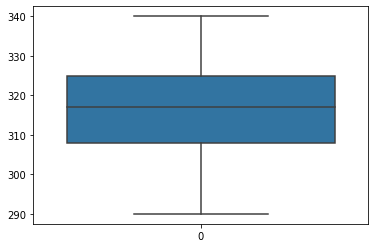

TOEFL Score


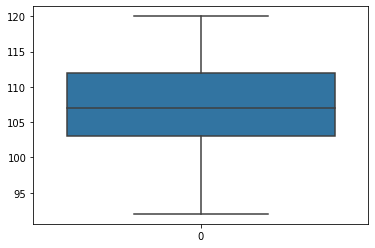

University Rating


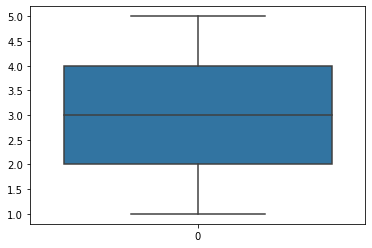

SOP


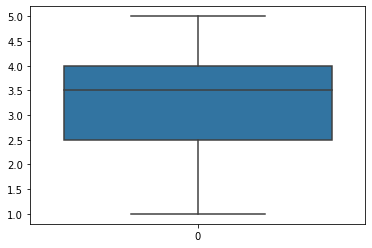

LOR


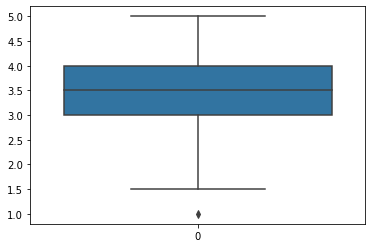

CGPA


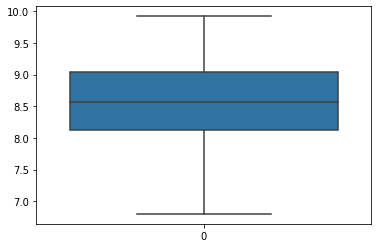

Research


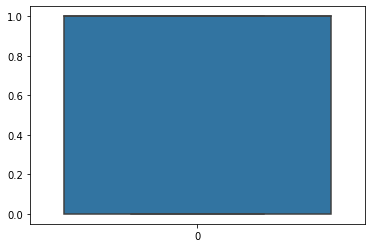

Chance of Admit


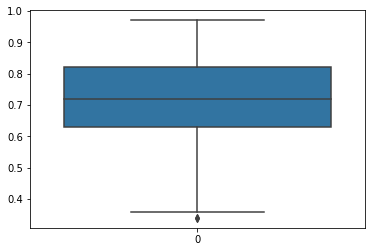

In [9]:
#checking for outliers using boxplot
for i in df.columns:
    sns.boxplot(df[i])
    print(i)
    plt.show()

In [10]:
df[df["LOR"]==1]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
347,299,94,1,1.0,1.0,7.34,0,0.42


GRE Score


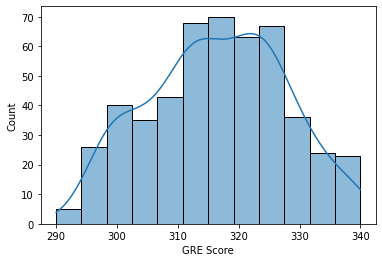

TOEFL Score


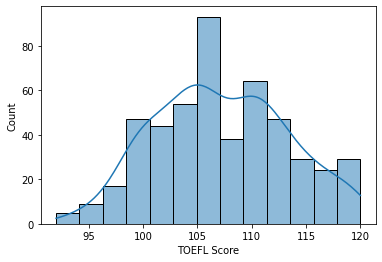

University Rating


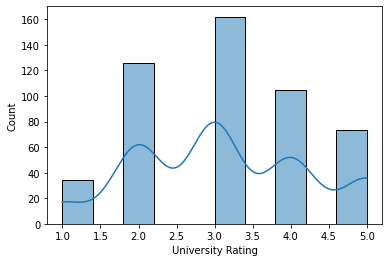

SOP


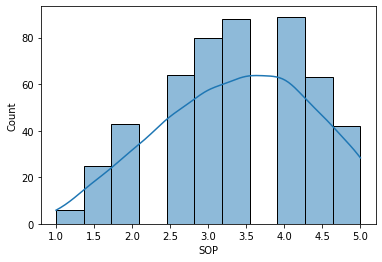

LOR


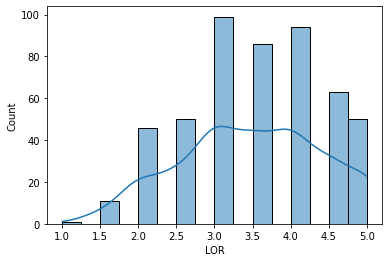

CGPA


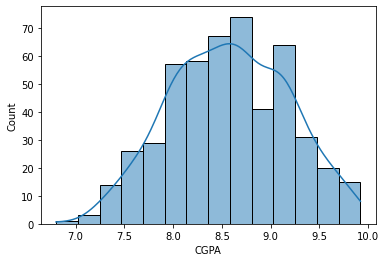

Research


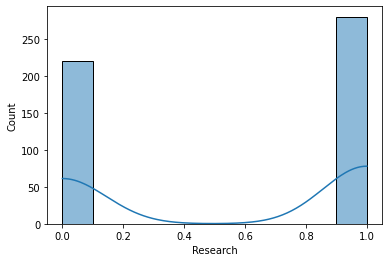

Chance of Admit


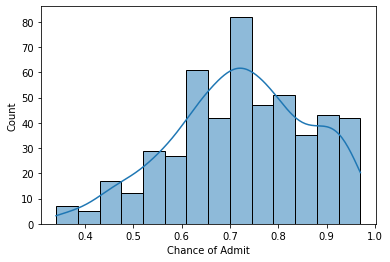

In [11]:
#checking distribution for each features
for i in df.columns:
    sns.histplot(df[i],kde=True)
    print(i)
    plt.show()

# Multivariate Analysis

<AxesSubplot: xlabel='GRE Score', ylabel='Chance of Admit'>

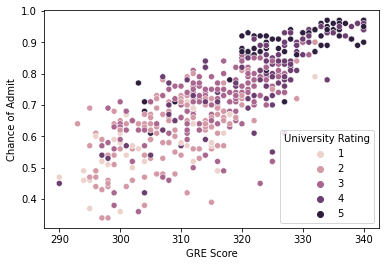

In [12]:
#Checking for parameters interrelation
sns.scatterplot(data=df, hue="University Rating", y="Chance of Admit",x="GRE Score")

<AxesSubplot: xlabel='SOP', ylabel='Chance of Admit'>

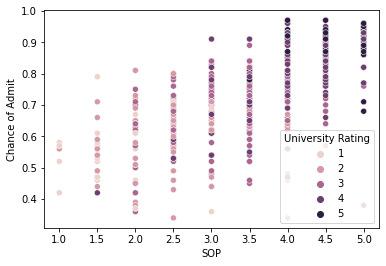

In [13]:
sns.scatterplot(data=df, hue="University Rating", y="Chance of Admit",x="SOP")

<AxesSubplot: xlabel='LOR', ylabel='Chance of Admit'>

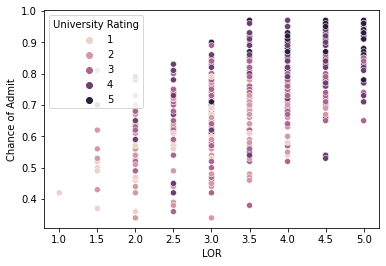

In [14]:
sns.scatterplot(data=df, hue="University Rating", y="Chance of Admit",x="LOR")

<AxesSubplot: xlabel='TOEFL Score', ylabel='Chance of Admit'>

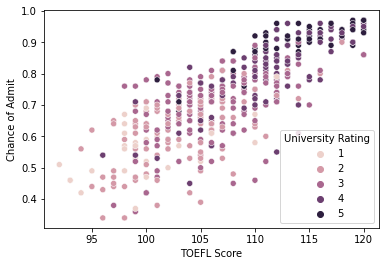

In [15]:
sns.scatterplot(data=df, hue="University Rating", y="Chance of Admit",x="TOEFL Score")

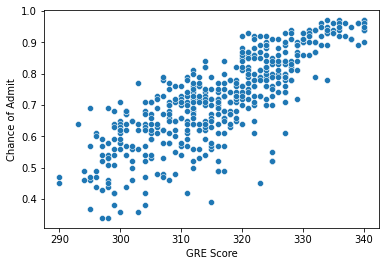

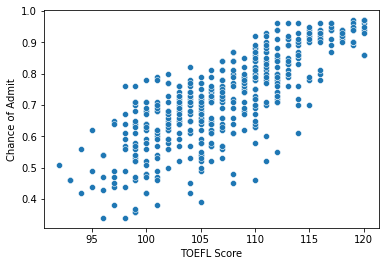

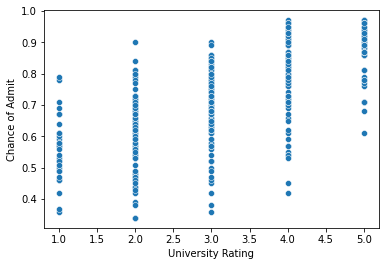

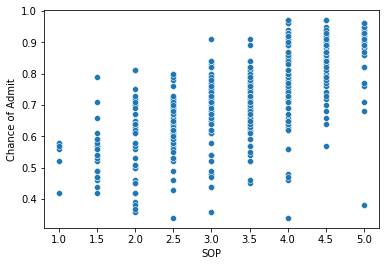

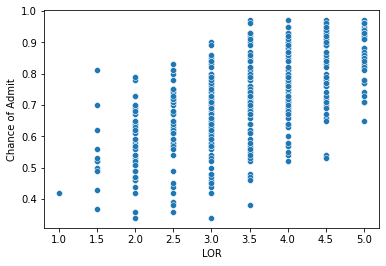

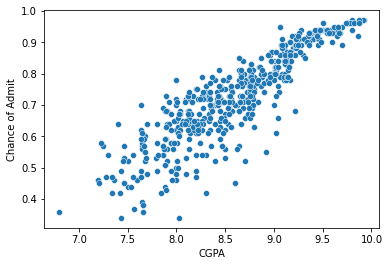

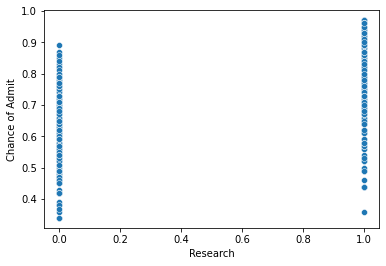

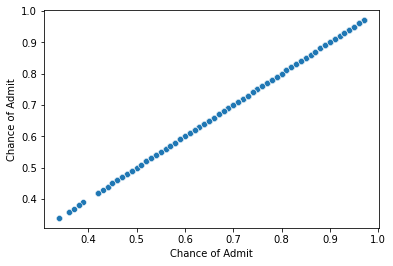

In [16]:
#checking for each parameter relation with target variable
for i in df.columns:
    sns.scatterplot(data=df, x=i, y="Chance of Admit")
    plt.show()
    

In [17]:
#descriptive analysis of dataset
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [18]:
dfk=df.copy()

In [19]:
#correlation between features
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


<AxesSubplot: >

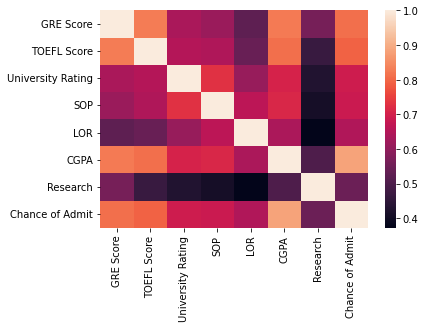

In [20]:
#heatmap for correlation between features
sns.heatmap(df.corr())

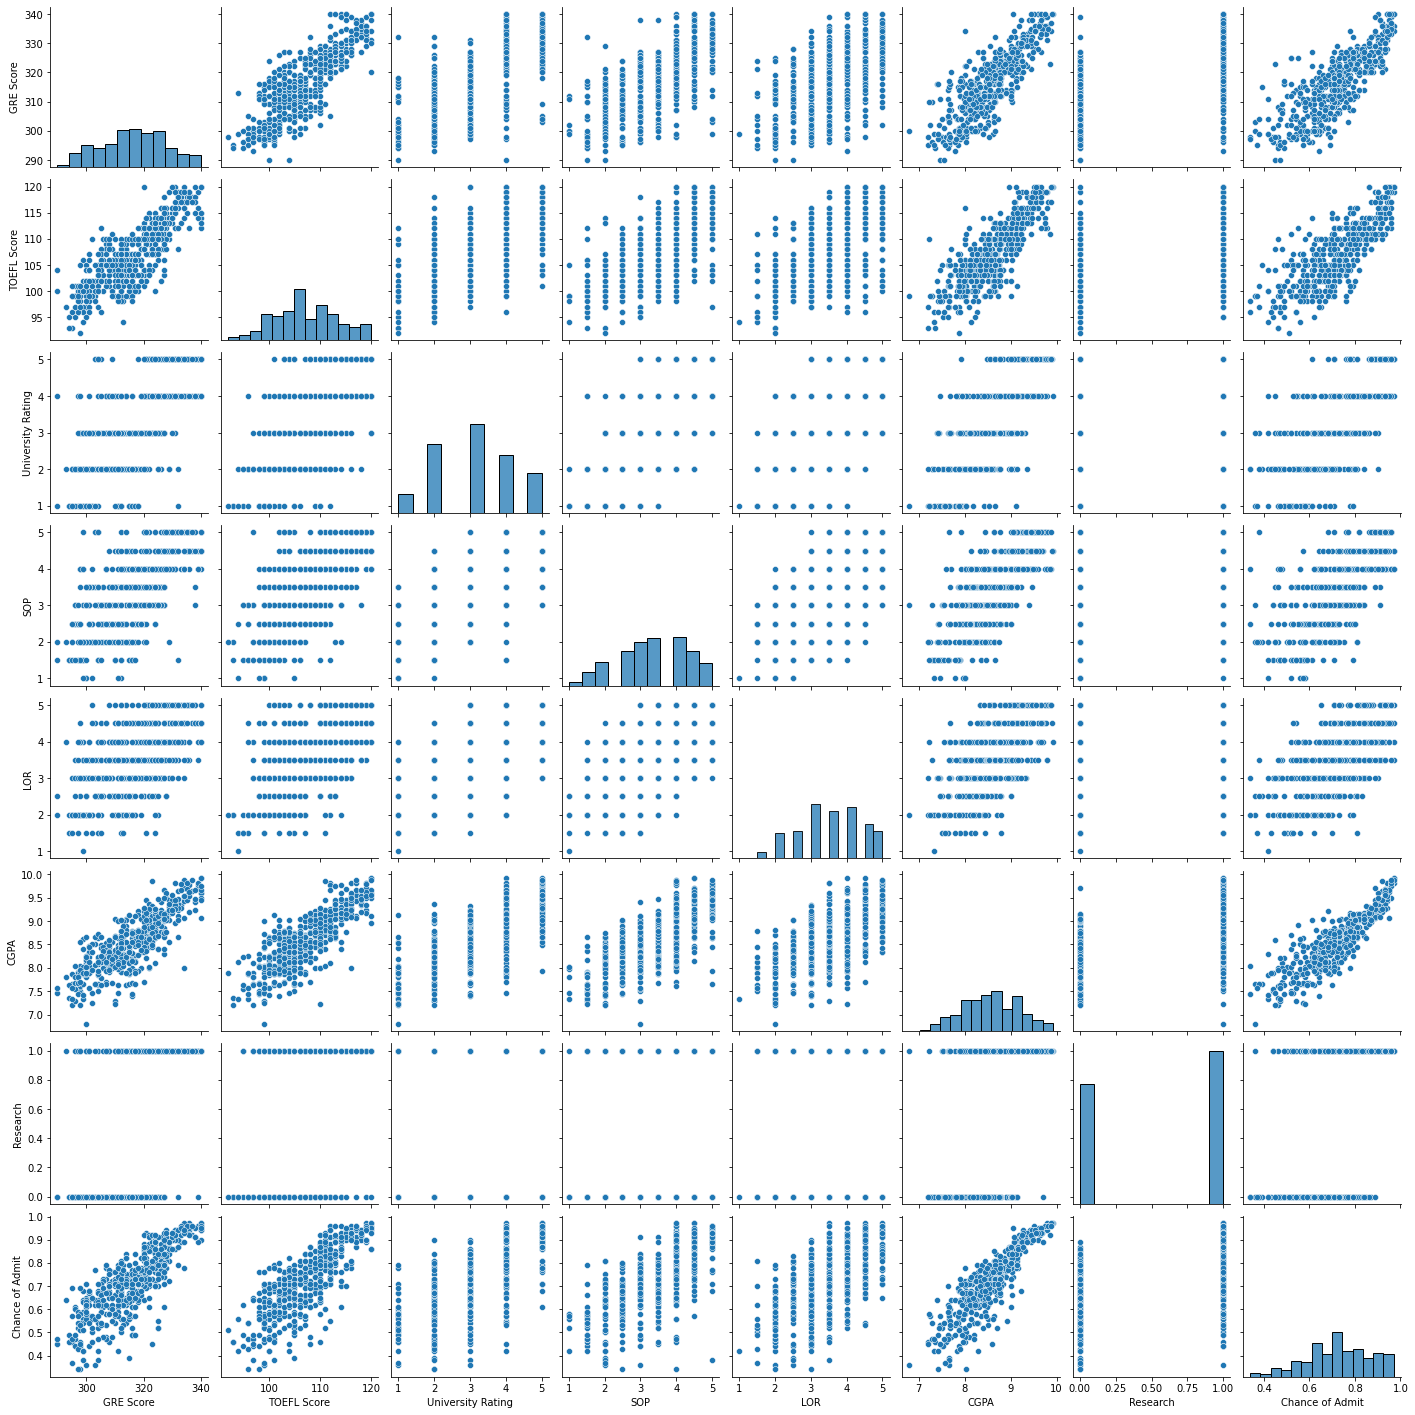

In [21]:
sns.pairplot(data=df)

# Insights based on EDA

# Comments on range of Attributes

* Sr. No. - It is unique row ID assciated with each row ranging from 1 to 500
* GRE Score - It is score obtained by student in GRE out of 340, ranging from 290 to 340
* TOEFL Score - It is score obtained by student in TOEFL out of 120, ranging from 92 to 120
* University Rating - It is rating for university out of 5, ranging from 1 to 5
* SOP -  It is points based on statement of Purpose out of 5, ranging from 1 to 5
* LOR - It is points based on Letter of Recommendation out of 5, ranging from 1 to 5
* CGPA - It is GPA obtained by student out of 10, ranging from 6.80 to 9.92
* Research - If student has research experience or not, given by 0 or 1
* Chace of Admit - It is our target feature gives chances of admission based on students score in given features, ranging from 0.37 to 0.94

# Comments on the distribution of Variables and relationship between them

* Based on heatmap, we can observe that each variables are highly correlated with each others except research
* We can observe that values of features are increasing alongwith other features, which can conclude that brilliant student can perform well in each other also
* features has peak values around median values of its ranges

# Comments based on univariate and bivariate plots

* Based on boxplots of features, we have found there is no outliers in features except LOR and traget variable Chance of Admit
* Based on plots between chance of admit and other features we can observe that features are linearly related with target variable
* Based on plots most students have higher number of scores compared to number of students having lower scores

# Data Preprocessing

In [22]:
#Duplicate Value check
df[df.duplicated()]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


In [23]:
#Missing value treatment
df.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [24]:
#outlier Treatment
df.drop(df[df["LOR"]==1].index, inplace=True)
#Outlier detected based on IQR Method and boxplot

In [25]:
# Dividing dataframe based on feature and target
X=df.loc[:,:"Research"]
y=df["Chance of Admit"]
print("shape of X:",X.shape)
print("Shape of y:", y.shape)

shape of X: (499, 7)
Shape of y: (499,)


In [26]:
#SPlitting data for training and testing
Xtrain, Xtest, ytrain, ytest= train_test_split(X,y, test_size=0.2, random_state=1)
print("Shape of Xtrain:", Xtrain.shape)
print("Shape of ytrain:", ytrain.shape)
print("Shape of Xtest:", Xtest.shape)
print("Shape of ytest:", ytest.shape)

Shape of Xtrain: (399, 7)
Shape of ytrain: (399,)
Shape of Xtest: (100, 7)
Shape of ytest: (100,)


In [27]:
#Scaling the data for model building
minmax=MinMaxScaler()
minmax.fit(Xtrain)
Xtrain=minmax.transform(Xtrain)
Xtest=minmax.transform(Xtest)

# Model Building

In [28]:
# Initialing Linear Regression model by using sklearn library
reg=LinearRegression()
reg.fit(Xtrain,ytrain)
y_pred=reg.predict(Xtest)

In [29]:
#DataFrame of feature to weights
wf = pd.DataFrame()
wf["Features"]=X.columns
wf["Weights"]=reg.coef_
wf

,Features,Weights
0,GRE Score,0.082020
1,TOEFL Score,0.089318
2,University Rating,0.026670
3,SOP,0.008592
4,LOR,0.053493
5,CGPA,0.376240
6,Research,0.020887


In [30]:
reg.score(Xtest,ytest)

0.7939328007335924

In [31]:
# Defining our performance metric
def adj_r2(X, y, r2_score):
  return 1 - ((1-r2_score)*(len(y)-1))/(len(y)-X.shape[1]-1)

In [32]:
adj_r2(Xtest,ytest,reg.score(Xtest,ytest))

0.7782537747024527

In [33]:
#Linear Regression summary Using statsmodels library
model = sm.OLS(y, X)
results = model.fit()

X_sm = sm.add_constant(X)  # Statmodels default is without intercept, to add intercept we need to add constant.

# Print the summary statistics of the model
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:        Chance of Admit   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                              8157.
Date:                Thu, 24 Aug 2023   Prob (F-statistic):                        0.00
Time:                        20:56:31   Log-Likelihood:                          633.27
No. Observations:                 499   AIC:                                     -1253.
Df Residuals:                     492   BIC:                                     -1223.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

* Ridge and Lasso Regression are checked after VIF Checks

# Testing the assumptions of Linear Regression

In [34]:
#Multicolinearity check
vif=pd.DataFrame()
X_t=X
vif["features"]=X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
0,GRE Score,1309.68
1,TOEFL Score,1216.36
5,CGPA,949.43
3,SOP,35.29
4,LOR,31.03
2,University Rating,20.93
6,Research,2.87


In [35]:
X.drop("GRE Score",axis=1, inplace=True)

In [36]:
Xtrain, Xtest, ytrain, ytest= train_test_split(X,y, test_size=0.2, random_state=1)
minmax=MinMaxScaler()
minmax.fit(Xtrain)
Xtrain=minmax.transform(Xtrain)
Xtest=minmax.transform(Xtest)
reg=LinearRegression()
reg.fit(Xtrain,ytrain)
y_pred=reg.predict(Xtest)
reg.score(Xtest,ytest)
adj_r2(Xtest,ytest,reg.score(Xtest,ytest))

0.7695544719324575

In [37]:
reg.score(Xtest,ytest)

0.7835208675729146

In [38]:
#VIF check
vif=pd.DataFrame()
X_t=X
vif["features"]=X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
4,CGPA,728.42
0,TOEFL Score,638.80
2,SOP,33.79
3,LOR,30.77
1,University Rating,19.88
5,Research,2.86


In [39]:
X.drop("CGPA",axis=1, inplace=True)

In [40]:
Xtrain, Xtest, ytrain, ytest= train_test_split(X,y, test_size=0.2, random_state=1)
minmax=MinMaxScaler()
minmax.fit(Xtrain)
Xtrain=minmax.transform(Xtrain)
Xtest=minmax.transform(Xtest)
reg=LinearRegression()
reg.fit(Xtrain,ytrain)
y_pred=reg.predict(Xtest)
reg.score(Xtest,ytest)
adj_r2(Xtest,ytest,reg.score(Xtest,ytest))

0.6726590234064352

In [41]:
reg.score(Xtest,ytest)

0.6891913959616658

In [42]:
#VIF check
vif=pd.DataFrame()
X_t=X
vif["features"]=X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
2,SOP,33.32
3,LOR,29.65
0,TOEFL Score,22.35
1,University Rating,19.74
4,Research,2.85


In [43]:
X.drop("SOP",axis=1, inplace=True)

In [44]:
Xtrain, Xtest, ytrain, ytest= train_test_split(X,y, test_size=0.2, random_state=1)
minmax=MinMaxScaler()
minmax.fit(Xtrain)
Xtrain=minmax.transform(Xtrain)
Xtest=minmax.transform(Xtest)
reg=LinearRegression()
reg.fit(Xtrain,ytrain)
y_pred=reg.predict(Xtest)
reg.score(Xtest,ytest)
adj_r2(Xtest,ytest,reg.score(Xtest,ytest))

0.6683955499991598

In [45]:
reg.score(Xtest,ytest)

0.6817937095951534

In [46]:
#VIF check
vif=pd.DataFrame()
X_t=X
vif["features"]=X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
2,LOR,25.87
0,TOEFL Score,20.09
1,University Rating,14.96
3,Research,2.82


In [47]:
X.drop("LOR",axis=1, inplace=True)

In [48]:
Xtrain, Xtest, ytrain, ytest= train_test_split(X,y, test_size=0.2, random_state=1)
minmax=MinMaxScaler()
minmax.fit(Xtrain)
Xtrain=minmax.transform(Xtrain)
Xtest=minmax.transform(Xtest)
reg=LinearRegression()
reg.fit(Xtrain,ytrain)
y_pred=reg.predict(Xtest)
reg.score(Xtest,ytest)
adj_r2(Xtest,ytest,reg.score(Xtest,ytest))

0.6334211346118341

In [49]:
reg.score(Xtest,ytest)

0.6445295850781423

In [50]:
#VIF check
vif=pd.DataFrame()
X_t=X
vif["features"]=X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
1,University Rating,11.89
0,TOEFL Score,10.32
2,Research,2.78


In [51]:
X.drop("University Rating",axis=1, inplace=True)

In [52]:
Xtrain, Xtest, ytrain, ytest= train_test_split(X,y, test_size=0.2, random_state=1)
minmax=MinMaxScaler()
minmax.fit(Xtrain)
Xtrain=minmax.transform(Xtrain)
Xtest=minmax.transform(Xtest)
reg=LinearRegression()
reg.fit(Xtrain,ytrain)
y_pred=reg.predict(Xtest)
reg.score(Xtest,ytest)
adj_r2(Xtest,ytest,reg.score(Xtest,ytest))

0.6169610110074553

In [53]:
reg.score(Xtest,ytest)

0.6246991724012441

In [54]:
#VIF check
vif=pd.DataFrame()
X_t=X
vif["features"]=X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
0,TOEFL Score,2.41
1,Research,2.41


Here by dropping the variables having high value of VIF are giving lower value of r2 score, so dropping the features having high VIF is not a good idea

So, we will use regularization

# Regularization

In [55]:
#Splitting target variable from features
X=df.loc[:,:"Research"]
y=df["Chance of Admit"]
print("shape of X:",X.shape)
print("Shape of y:", y.shape)

shape of X: (499, 7)
Shape of y: (499,)


In [56]:
#Splitting the dataset into test and train data
Xtrain, Xtest, ytrain, ytest= train_test_split(X,y, test_size=0.2, random_state=1)
minmax=MinMaxScaler()
minmax.fit(Xtrain)
Xtrain=minmax.transform(Xtrain)
Xtest=minmax.transform(Xtest)

In [57]:
# initialize Lasso regression and set the value of alpha equal to 1
regressor = Lasso()
    
# fit the model
regressor.fit(Xtrain, ytrain)

regressor.score(Xtest,ytest)

-0.005048980765729905

In [58]:
adj_r2(Xtest,ytest,regressor.score(Xtest,ytest))

-0.08152009886747025

In [59]:
# initialize ElasticNet regression and set the value of alpha equal to 1
regressor = ElasticNet()
    
# fit the model
regressor.fit(Xtrain, ytrain)

regressor.score(Xtest,ytest)

-0.005048980765729905

In [60]:
adj_r2(Xtest,ytest,regressor.score(Xtest,ytest))

-0.08152009886747025

In [61]:
# initialize Ridge regression and set the value of alpha equal to 1
regressor = Ridge()
    
# fit the model
regressor.fit(Xtrain, ytrain)

regressor.score(Xtest,ytest)

0.7943669502342133

In [62]:
regressor.score(Xtrain,ytrain)

0.8230009201124773

In [63]:
#DataFrame of feature to weights
wf = pd.DataFrame()
wf["Features"]=X.columns
wf["Weights"]=regressor.coef_
wf

,Features,Weights
0,GRE Score,0.099536
1,TOEFL Score,0.100781
2,University Rating,0.033542
3,SOP,0.020241
4,LOR,0.059684
5,CGPA,0.302905
6,Research,0.022892


In [64]:
adj_r2(Xtest,ytest,regressor.score(Xtest,ytest))

0.7787209573172513

In [65]:
y_pred=regressor.predict(Xtest)

In [66]:
Error = y_pred - ytest

# Mean of Residual

In [67]:
# The mean of residual is nearly zero
sum(ytest-y_pred)/len(ytest)

0.001164558482279357

# Residual Plot

Text(0.5, 1.0, 'Residual Plot')

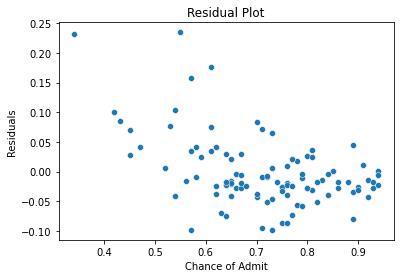

In [68]:
# Residuals plot
sns.scatterplot(x=ytest, y=Error)
plt.ylabel("Residuals")
plt.title("Residual Plot")

# Normality of Residuals

Text(0.5, 0, 'Error')

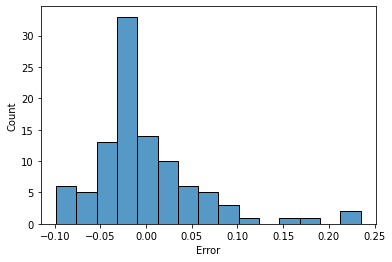

In [69]:
#Plot for Error 
sns.histplot(x=Error)
plt.xlabel("Error")

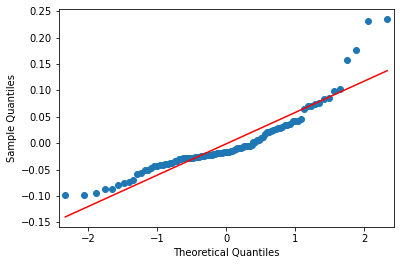

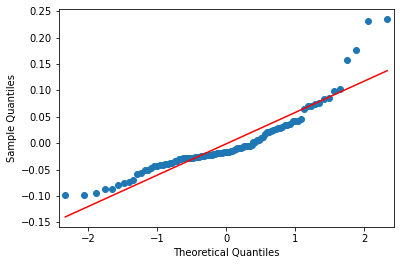

In [70]:
qqplot(Error,line="s")

# Homoscedasticity Plot

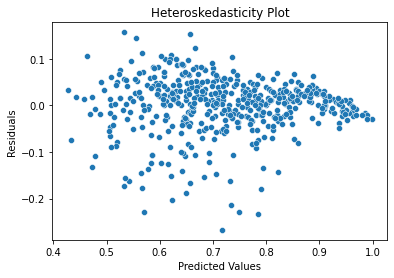

In [71]:
# initialize Ridge regression and set the value of alpha equal to 1
reg = Ridge()
    
# fit the model
reg.fit(X, y)
# Fit the linear regression model
predicted_values = reg.predict(X)
residuals = y - predicted_values

# Create a heteroskedasticity plot
sns.scatterplot(x=predicted_values, y=residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Heteroskedasticity Plot')
plt.show()

# Metrics Checking

* Mean Absolute Error

In [72]:
MAE_test = sum(abs(regressor.predict(Xtest)-ytest))/len(ytest)
MAE_train = sum(abs(regressor.predict(Xtrain)-ytrain))/len(ytrain)
print("Mean Absolute Error for Test", MAE_test)
print("Mean Absolute Error for Train", MAE_train)

Mean Absolute Error for Test 0.0424033149250962
Mean Absolute Error for Train 0.043059151407798965


* Mean Square Error

In [73]:
MSE_test = sum((regressor.predict(Xtest)-ytest)**2)/len(ytest)
MSE_train = sum((regressor.predict(Xtrain)-ytrain)**2)/len(ytrain)
print("Mean Square Error for Test", MAE_test)
print("Mean Square Error for Train", MAE_train)

Mean Square Error for Test 0.0424033149250962
Mean Square Error for Train 0.043059151407798965


* R2_score

In [74]:
print("R2_Score for Test", regressor.score(Xtest,ytest))
print("R2_score for Train", regressor.score(Xtrain, ytrain))

R2_Score for Test 0.7943669502342133
R2_score for Train 0.8230009201124773


* Adjusted R2 Score

In [75]:
print("Adjusted R2 Score for Test", adj_r2(Xtest,ytest,regressor.score(Xtest,ytest)))
print("Adjusted R2 Score for Test", adj_r2(Xtrain,ytrain,regressor.score(Xtrain,ytrain)))

Adjusted R2 Score for Test 0.7787209573172513
Adjusted R2 Score for Test 0.8198321386311149


Comments on the Performance measures

* Here we can observe that model has nearby values for almost all the parameters for test data and train data
* So, We can say that our model has low bias and low variance.
* Our model is perfectly fit.
* Further Improvements can be done by having a higher number of data points.

# Linear Regression using KFold Validation

In [80]:
kf=KFold(n_splits=4)

In [81]:
X=dfk.loc[:,:"Research"]
y=dfk["Chance of Admit"]
print("shape of X:",X.shape)
print("Shape of y:", y.shape)

shape of X: (500, 7)
Shape of y: (500,)


In [82]:
minmax=MinMaxScaler()
minmax.fit(X)
X=minmax.transform(X)

In [83]:
train_scores=[]
val_scores=[]
for train,val in kf.split(X):
    xtrain, xval = X[train], X[val]
    ytrain, yval= y[train], y[val]
    
    regressor=LinearRegression()
    regressor.fit(xtrain,ytrain)
    
    train_scores.append(adj_r2(xtrain, ytrain, regressor.score(xtrain, ytrain)))
    val_scores.append(adj_r2(xval, yval, regressor.score(xval, yval)))
print(np.mean(train_scores))
print(np.mean(val_scores))

0.8254613886197815
0.7683379148848986


# Actionable Insights and Recommendations

* We have used Linear Regression models for predicting the chances of Admit for the student and we have used features provided in the dataset

* By using weights associated with predictor variables, we can say that CGPA has highest weight compared to other features, so small changes in the CGPA will reflect higher on the predicted variables, i.e. increase or decrease will affect higher on the chance of Admit. So, one can suggest to more focus on increasing CGPA to increase chance of Admit

* GRE Score and TOEFL Scores have approximately same values of weights which gives us similar value to the chance of Admit.

* Here, our R2 scores of model are around 0.82, which can be improved by having higher amount of data to train and test the data.

* By improving the model, we will have higher accuracy in predicting the chance of admit, which will generate higher trust values in the market for organization, which will eventually increase the business.

* By improving our model one can predict the chance of Admit based on it and decide whether student will get admission in IVY league colleges or not, and it can save huge cost of application fees and time for processing of application by considering the college that has higher chance of admission on higher side.
